In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os

In [3]:
im = mpimg.imread(os.path.join('cases', 'brickley', 'JMC Work', 'analysis', '/Users/joe/google_site_1920_1080.png'))

In [4]:
print('Type of the image : ' , type(im))
print()
print('Shape of the image : {}'.format(im.shape))
print('Image Height {}'.format(im.shape[0]))
print('Image Width {}'.format(im.shape[1]))
print('Dimension of Image {}'.format(im.ndim))

Type of the image :  <class 'numpy.ndarray'>

Shape of the image : (1080, 1920, 4)
Image Height 1080
Image Width 1920
Dimension of Image 3


### Get pixel coordinates from image

In [5]:
# https://stackoverflow.com/questions/56787999/python-opencv-realtime-get-rgb-values-when-mouse-is-clicked
def mouseRGB(event,x,y,flags,param):
    
    if event == cv2.EVENT_LBUTTONDOWN: #checks mouse left button down condition
        colorsB = image[y,x,0]
        colorsG = image[y,x,1]
        colorsR = image[y,x,2]
        colors = image[y,x]
        #print("Red: ",colorsR)
        #print("Green: ",colorsG)
        #print("Blue: ",colorsB)
        #print("BRG Format: ",colors)
        print("Coordinates of pixel: X: ",x,"Y: ",y)
        # create list of x,y coordinates
        #x_coor = []
        
# Read an image, a window and bind the function to window
image = im
cv2.namedWindow('mouseRGB')
cv2.setMouseCallback('mouseRGB',mouseRGB)

#Do until esc pressed
while(1):
    cv2.imshow('mouseRGB',image)
    if cv2.waitKey(20) & 0xFF == 27:
        break
#if esc pressed, finish.
cv2.destroyAllWindows()

2023-10-24 10:31:24.547 Python[1460:61701] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


Coordinates of pixel: X:  1570 Y:  1072
Coordinates of pixel: X:  1891 Y:  1066
Coordinates of pixel: X:  1901 Y:  1066
Coordinates of pixel: X:  1912 Y:  1052
Coordinates of pixel: X:  1571 Y:  1065
Coordinates of pixel: X:  1170 Y:  469
Coordinates of pixel: X:  1571 Y:  1070
Coordinates of pixel: X:  1918 Y:  1068
Coordinates of pixel: X:  1570 Y:  1070
Coordinates of pixel: X:  1639 Y:  560
Coordinates of pixel: X:  1431 Y:  541


KeyboardInterrupt: 

In [ ]:
# use external plot to get pixel locations
%matplotlib qt
imgplot = plt.imshow(im)

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,8))
imgplot = plt.imshow(im)

In [5]:
# Plot Control Points
u1 = 192
v1 = 916
u2 = 1342
v2 = 681
u3 = 1270
v3 = 615
u4 = 210
v4 = 812

In [6]:
# import control points
cp_table = np.genfromtxt('control_points.csv', dtype='float', delimiter=',', skip_header=1)
u_c = cp_table[:, 1]
v_c = cp_table[:, 2]

Input Data:


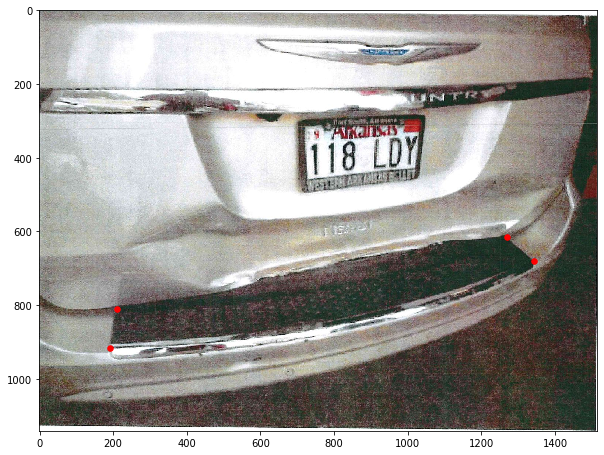

In [7]:
%matplotlib inline
plt.figure(figsize=(10,8))
imgplot = plt.imshow(im)
plt.scatter(x = u_c, y = v_c, c = 'r', s = 30)
plt.show()

In [8]:
# import points of interest
cp_table = np.genfromtxt('interest_points.csv', dtype='float', delimiter=',', skip_header=1)
u_i = cp_table[:, 1]
v_i = cp_table[:, 2]

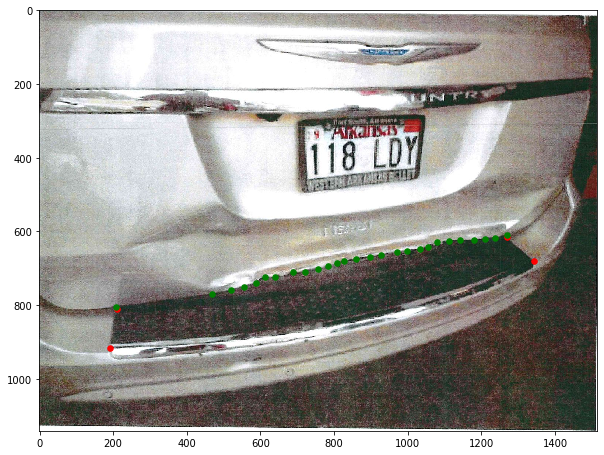

In [9]:
%matplotlib inline
plt.figure(figsize=(10,8))
imgplot = plt.imshow(im)
plt.scatter(x = u_c, y = v_c, c = 'r', s = 30)
plt.scatter(x = u_i, y = v_i, c = 'g', s = 30)
plt.show()

In [7]:
# x-y control points
x1 = 0
y1 = 0
x2 = 44.75
y2 = 0
x3 = 44.75
y3 = -3.5
x4 = 0
y4 = -3.5

In [8]:
# create input matrix
uv_xy = np.zeros((4,4))
uv_xy[0,0] = u1
uv_xy[1,0] = u2
uv_xy[2,0] = u3
uv_xy[3,0] = u4

uv_xy[0,1] = v1
uv_xy[1,1] = v2
uv_xy[2,1] = v3
uv_xy[3,1] = v4

uv_xy[0,2] = x1
uv_xy[1,2] = x2
uv_xy[2,2] = x3
uv_xy[3,2] = x4

uv_xy[0,3] = y1
uv_xy[1,3] = y2
uv_xy[2,3] = y3
uv_xy[3,3] = y4

In [9]:
uv_xy

array([[ 192.  ,  916.  ,    0.  ,    0.  ],
       [1342.  ,  681.  ,   44.75,    0.  ],
       [1270.  ,  615.  ,   44.75,   -3.5 ],
       [ 210.  ,  812.  ,    0.  ,   -3.5 ]])

In [10]:
len(uv_xy)

4

In [11]:
# load planar homography function
from phomo import phomo
uv_sf, xy_sf, u_bar, v_bar, x_bar, y_bar, M_inv = phomo(uv_xy)

In [12]:
print(f'x-y scale factor {xy_sf}')
print(f'x_bar {x_bar}')
print(f'y_bar {y_bar}')
print(f'M_inv {M_inv}')

x-y scale factor 0.06301263997878921
x_bar 22.375
y_bar -1.75
M_inv [[ 9.49125724e-01 -4.35623458e-01 -1.62363057e-01]
 [ 1.92786738e-01  9.90375418e-01  4.99331474e-03]
 [-6.10480766e-05  4.25474852e-01  1.01498487e+00]]


### Create table of u,v values of interest to map

In [6]:
# https://stackoverflow.com/questions/56787999/python-opencv-realtime-get-rgb-values-when-mouse-is-clicked
import cv2
import numpy as np
x_corr = [0]
y_corr = [0]

def mouseRGB(event,x,y,flags,param):
    global x_corr, y_corr

    if event == cv2.EVENT_LBUTTONDOWN: #checks mouse left button down condition
        colorsB = image[y,x,0]
        colorsG = image[y,x,1]
        colorsR = image[y,x,2]
        colors = image[y,x]
        #print("Red: ",colorsR)
        #print("Green: ",colorsG)
        #print("Blue: ",colorsB)
        #print("BRG Format: ",colors)
        print("Coordinates of pixel: X: ",x,"Y: ",y)

        
# Read an image, a window and bind the function to window   
image = im
cv2.namedWindow('mouseRGB')
cv2.setMouseCallback('mouseRGB',mouseRGB)

#Do until esc pressed
i = 0
while(1):
    cv2.imshow('mouseRGB',image)
    i =+ 1
        #x_corr = x_corr.append(x)
        #y_corr = y_corr.append(y)
    if cv2.waitKey(20) & 0xFF == 27:
        break
#if esc pressed, finish.
cv2.destroyAllWindows()



Coordinates of pixel: X:  206 Y:  808
Coordinates of pixel: X:  1245 Y:  613


In [7]:
i

1

In [13]:
uv_in =  np.zeros((len(u_),2))
uv_in[:,0] = u_
uv_in[:,1] = v_ 

NameError: name 'u_' is not defined

In [ ]:
from phomo import xy_map
xy_map(uv_sf, xy_sf, u_bar, v_bar, x_bar, y_bar, M_inv, uv_in)